
Project: Employee salary prediction using diffrent machine learning algorithms

Created by: Ravi Asopa


In [21]:
#Import required libray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import joblib

In [22]:
#Importing dataset csv file
df = pd.read_csv('salary.csv')
df.shape #print rows and coulumns of dataset

(5000, 11)

In [23]:
#Perform EDA(Exploratory Data Analysis) on salary dataset
df.head(10) #print first 10 rows of dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M
5,2024,MI,FT,Research Engineer,26000,EUR,28888,PT,0,PT,M
6,2023,EX,FT,Machine Learning Engineer,145000,USD,145000,US,100,US,M
7,2022,SE,FT,Data Scientist,130000,USD,130000,US,100,US,M
8,2023,SE,FT,Data Scientist,159832,USD,159832,US,0,US,M
9,2024,SE,FT,Data Engineer,160000,USD,160000,US,0,US,M


In [24]:
df.info() #print dataset info - coulumns, null-count, data-types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   experience_level    5000 non-null   object
 2   employment_type     5000 non-null   object
 3   job_title           5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_currency     5000 non-null   object
 6   salary_in_usd       5000 non-null   int64 
 7   employee_residence  5000 non-null   object
 8   remote_ratio        5000 non-null   int64 
 9   company_location    5000 non-null   object
 10  company_size        5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


In [25]:
#Converting some short-form into full-form for better understanding of dataset
employment_map = {
    'FT': 'Full-Time',
    'PT': 'Part-Time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

experience_map = {
    'EN': 'Entry-Level',
    'MI': 'Mid-Level',
    'SE': 'Senior-Level',
    'EX': 'Executive-Level'
}

company_size_map = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}
df['employment_type']= df['employment_type'].map(employment_map)
df['experience_level'] = df['experience_level'].map(experience_map)
df['company_size'] = df['company_size'].map(company_size_map)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Mid-Level,Full-Time,Data Analyst,165000,USD,165000,AU,0,AU,Medium
1,2023,Mid-Level,Full-Time,Data Analyst,70000,USD,70000,US,100,US,Medium
2,2024,Mid-Level,Full-Time,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,Medium
3,2024,Senior-Level,Full-Time,Data Scientist,92700,USD,92700,US,0,US,Medium
4,2023,Mid-Level,Full-Time,Research Engineer,150000,USD,150000,US,0,US,Medium


In [26]:
#Droping unnecessary columns from datasets
df = df.drop(['work_year', 'salary','salary_currency','remote_ratio', 'employee_residence'], axis=1)
df.head()

,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,Mid-Level,Full-Time,Data Analyst,165000,AU,Medium
1,Mid-Level,Full-Time,Data Analyst,70000,US,Medium
2,Mid-Level,Full-Time,Machine Learning Engineer,94444,IE,Medium
3,Senior-Level,Full-Time,Data Scientist,92700,US,Medium
4,Mid-Level,Full-Time,Research Engineer,150000,US,Medium


In [27]:
#Saving cleaned dataset into new csv file
df.to_csv('cleaned_salary_data.csv', index=False)

In [28]:
#Label encoding string values to integers of dataset
le = LabelEncoder()
df['experience_level'] = le.fit_transform(df['experience_level'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['job_title'] = le.fit_transform(df['job_title'])
df['company_location'] = le.fit_transform(df['company_location'])
df['company_size'] = le.fit_transform(df['company_size'])

In [29]:
#Define x and y to to train model
x = df.drop(['salary_in_usd'], axis=1)
y = df['salary_in_usd']

#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

--- LinearRegression ---
Mean Absolute Error (MAE): 46387.64
Root Mean Squared Error (RMSE): 64102.63
R-squared (R2): 0.1743

--- RandomForest ---
Mean Absolute Error (MAE): 40792.61
Root Mean Squared Error (RMSE): 58242.17
R-squared (R2): 0.3184

--- GradientBoosting ---
Mean Absolute Error (MAE): 40684.08
Root Mean Squared Error (RMSE): 57822.89
R-squared (R2): 0.3281

--- DecisionTree ---
Mean Absolute Error (MAE): 41310.01
Root Mean Squared Error (RMSE): 59047.50
R-squared (R2): 0.2994

--- SVR ---
Mean Absolute Error (MAE): 52624.66
Root Mean Squared Error (RMSE): 71090.08
R-squared (R2): -0.0155


✅ Best model: GradientBoosting with MAE 40684.08
✅ Saved best model pipeline as best_model_pipeline.pkl


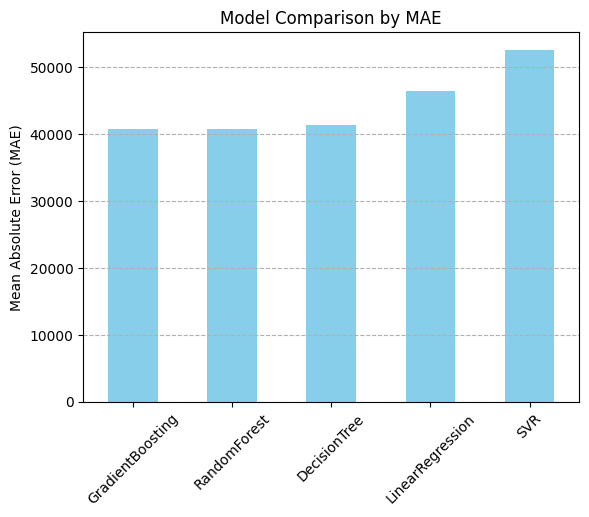

In [30]:
#Train diffrenet model of machine learning
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR()
}
trained_pipelines = {}
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)    
    #Store results
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

    trained_pipelines[name] = pipe
    
    #Print results for each model
    print(f"--- {name} ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.4f}\n")

   
   
    best_model_name = min(results, key=lambda x: results[x]['MAE'])
    best_model_mae = results[best_model_name]['MAE']
    best_model = models[best_model_name]

print(f"\n✅ Best model: {best_model_name} with MAE {best_model_mae:.2f}")

#Save the best model pipeline
joblib.dump(best_model, "best_pipeline.pkl")
print("✅ Saved best model pipeline as best_model_pipeline.pkl")

#Visualize the results
results_df = pd.DataFrame(results).T
results_df['MAE'].sort_values().plot(kind='bar', color='skyblue')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison by MAE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [31]:
#Creating streamlit app for user interactions
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import requests # Added for API calls

#Set page configuration
st.set_page_config(page_title="Employee Salary Prediction", page_icon="🕴️", layout="wide")

# --- Initialize Session State ---
# This will store the prediction result across app reruns
if 'predicted_salary_usd' not in st.session_state:
    st.session_state.predicted_salary_usd = None

# --- Custom CSS for Dark Theme Readability ---
st.markdown("""
<style>
    /* Targeting the Streamlit app's main container in dark mode */
    .stApp {
        background-color: #0E1117;
    }

    /* Style the dropdown widget itself (the closed box) */
    [data-testid="stSelectbox"] div[data-baseweb="select"] > div {
        background-color: #262730; /* Dark background for the box */
        color: white; /* White text for the selected item */
        border-radius: 5px;
    }

    /* Style the dropdown menu that pops up */
    div[data-baseweb="popover"] ul {
        background-color: #31333F; /* A slightly lighter dark for the menu background */
        border-radius: 5px;
        border: 1px solid #4A4C5A;
    }

    /* Style each option (list item) in the dropdown menu */
    div[data-baseweb="popover"] ul li {
        color: #FAFAFA; /* Bright text for readability */
        padding: 8px 12px;
        transition: background-color 0.2s ease;
    }

    /* Style the hover effect on dropdown options */
    div[data-baseweb="popover"] ul li:hover {
        background-color: #4A4C5A; /* Highlight on hover for better UX */
    }

    /* --- Comprehensive Button Styling --- */
    .stButton>button {
        border: none;
        border-radius: 5px;
        padding: 10px 20px;
        font-size: 16px;
        cursor: pointer;
        background-color: #1e88e5;
        color: white !important;
        width: 100%;
        transition: background-color 0.3s;
    }

    .stButton>button:hover, .stButton>button:focus, .stButton>button:active {
        background-color: #1565c0 !important;
        color: #E0E0E0 !important;
        outline: none !important;
        box-shadow: none !important;
        border: none !important;
    }
</style>
""", unsafe_allow_html=True)


@st.cache_data
def load_data():
    df = pd.read_csv('cleaned_salary_data.csv')
    return df

#Function to get exchange rates with caching
@st.cache_data(ttl=3600) # Cache for 1 hour
def get_exchange_rates():
    try:
        response = requests.get("https://api.exchangerate-api.com/v4/latest/USD")
        response.raise_for_status()
        return response.json()
    except requests.RequestException:
        return None

df = load_data()
rates_data = get_exchange_rates()

#Load the trained pipeline
try:
    pipeline = joblib.load("best_pipeline.pkl")
except FileNotFoundError:
    st.error("Model file 'best_pipeline.pkl' not found. Please re-run the notebook to save the pipeline file.")
    st.stop()

# --- Mappings ---
experience_map = {'Entry-Level': 0, 'Executive-Level': 1, 'Mid-Level': 2, 'Senior-Level': 3}
employment_map =  {'Contract': 0, 'Freelance': 1, 'Full-Time': 2, 'Part-Time': 3}
job_title_map = {'AI Architect': 0, 'AI Developer': 1, 'AI Engineer': 2, 'AI Programmer': 3, 'AI Research Engineer': 4, 'AI Research Scientist': 5,
                 'AI Scientist': 6, 'AWS Data Architect': 7, 'Analytics Engineer': 8, 'Applied Data Scientist': 9,
                 'Applied Machine Learning Scientist': 10, 'Applied Scientist': 11, 'Autonomous Vehicle Technician': 12, 'BI Analyst': 13,
                 'BI Data Analyst': 14, 'BI Data Engineer': 15, 'BI Developer': 16, 'Big Data Architect': 17, 'Big Data Developer': 18,
                 'Big Data Engineer': 19, 'Business Data Analyst': 20, 'Business Intelligence': 21, 'Business Intelligence Analyst': 22,
                 'Business Intelligence Developer': 23, 'Business Intelligence Engineer': 24, 'Business Intelligence Lead': 25,
                 'Business Intelligence Manager': 26, 'Business Intelligence Specialist': 27, 'CRM Data Analyst': 28, 'Cloud Data Engineer': 29,
                 'Cloud Database Engineer': 30, 'Computational Biologist': 31, 'Computer Vision Engineer': 32, 'Computer Vision Software Engineer': 33,
                 'Data Analyst': 34, 'Data Analyst Lead': 35, 'Data Analytics Consultant': 36, 'Data Analytics Engineer': 37,
                 'Data Analytics Lead': 38, 'Data Analytics Manager': 39, 'Data Analytics Specialist': 40, 'Data Architect': 41,
                 'Data DevOps Engineer': 42, 'Data Developer': 43, 'Data Engineer': 44, 'Data Infrastructure Engineer': 45,
                 'Data Integration Developer': 46, 'Data Integration Engineer': 47, 'Data Integration Specialist': 48, 'Data Lead': 49,
                 'Data Management Analyst': 50, 'Data Management Consultant': 51, 'Data Management Specialist': 52, 'Data Manager': 53,
                 'Data Modeler': 54, 'Data Modeller': 55, 'Data Operations Analyst': 56, 'Data Operations Associate': 57,
                 'Data Operations Engineer': 58, 'Data Operations Specialist': 59, 'Data Pipeline Engineer': 60, 'Data Product Manager': 61,
                 'Data Quality Analyst': 62, 'Data Quality Engineer': 63, 'Data Reporting Analyst': 64, 'Data Science': 65,
                 'Data Science Analyst': 66, 'Data Science Consultant': 67, 'Data Science Director': 68, 'Data Science Engineer': 69,
                 'Data Science Lead': 70, 'Data Science Manager': 71, 'Data Science Practitioner': 72, 'Data Scientist': 73, 'Data Specialist': 74,
                 'Data Strategist': 75, 'Data Visualization Engineer': 76, 'Data Visualization Specialist': 77, 'Decision Scientist': 78,
                 'Deep Learning Engineer': 79, 'Director of Data Science': 80, 'ETL Developer': 81, 'ETL Engineer': 82,
                 'Encounter Data Management Professional': 83, 'Finance Data Analyst': 84, 'Financial Data Analyst': 85, 'Head of Data': 86,
                 'Head of Data Science': 87, 'Head of Machine Learning': 88, 'Insight Analyst': 89, 'Lead Data Analyst': 90,
                 'Lead Data Engineer': 91, 'Lead Data Scientist': 92, 'Lead Machine Learning Engineer': 93, 'ML Engineer': 94, 'ML Ops Engineer': 95,
                 'MLOps Engineer': 96, 'Machine Learning Developer': 97, 'Machine Learning Engineer': 98,
                 'Machine Learning Infrastructure Engineer': 99, 'Machine Learning Manager': 100, 'Machine Learning Modeler': 101,
                 'Machine Learning Operations Engineer': 102, 'Machine Learning Research Engineer': 103, 'Machine Learning Researcher': 104,
                 'Machine Learning Scientist': 105, 'Machine Learning Software Engineer': 106, 'Marketing Data Engineer': 107, 'NLP Engineer': 108,
                 'Principal Data Analyst': 109, 'Principal Data Scientist': 110, 'Product Data Analyst': 111, 'Prompt Engineer': 112,
                 'Quantitative Research Analyst': 113, 'Research Analyst': 114, 'Research Engineer': 115, 'Research Scientist': 116,
                 'Robotics Engineer': 117, 'Robotics Software Engineer': 118, 'Sales Data Analyst': 119, 'Staff Data Analyst': 120,
                 'Staff Data Scientist': 121, 'Staff Machine Learning Engineer': 122
                }
location_map =  {'AE': 0, 'AM': 1, 'AR': 2, 'AS': 3, 'AT': 4, 'AU': 5, 'BE': 6, 'BR': 7, 'CA': 8, 'CF': 9, 'CH': 10, 'CO': 11, 'DE': 12, 'DK': 13,
                 'EC': 14, 'EE': 15, 'EG': 16, 'ES': 17, 'FI': 18, 'FR': 19, 'GB': 20, 'GH': 21, 'GR': 22, 'HN': 23, 'IE': 24, 'IL': 25, 'IN': 26,
                 'IQ': 27, 'IT': 28, 'JP': 29, 'KR': 30, 'LT': 31, 'LU': 32, 'LV': 33, 'MT': 34, 'MX': 35, 'MY': 36, 'NG': 37, 'NL': 38, 'NZ': 39,
                 'PH': 40, 'PK': 41, 'PL': 42, 'PT': 43, 'RO': 44, 'RU': 45, 'SE': 46, 'SG': 47, 'SI': 48, 'TH': 49, 'TR': 50, 'UA': 51, 'US': 52,
                 'VN': 53, 'ZA': 54}
company_size_map = {'Large': 0, 'Medium': 1, 'Small': 2}


# --- App Title ---
st.title("🕴️ Employee Salary Prediction App")
st.markdown("Predict an employee's salary based on their professional details.")

# --- Prediction Section ---
with st.container():
    st.header("🔮 Predict Salary")

    exp_level_options = ['Select'] + list(experience_map.keys())
    emp_type_options = ['Select'] + list(employment_map.keys())
    job_title_options = ['Select'] + list(job_title_map.keys())
    company_loc_options = ['Select'] + list(location_map.keys())
    company_size_options = ['Select'] + list(company_size_map.keys())

    col1, col2 = st.columns(2)
    with col1:
        experience_level_str = st.selectbox("Experience Level", options=exp_level_options, index=0)
        employment_type_str = st.selectbox("Employment Type", options=emp_type_options, index=0)
        job_title_str = st.selectbox("Job Title", options=job_title_options, index=0)

    with col2:
        company_location_str = st.selectbox("Company Location", options=company_loc_options, index=0)
        company_size_str = st.selectbox("Company Size", options=company_size_options, index=0)
    
    st.write("")
    if st.button("Predict Salary"):
        #Reset previous prediction before starting
        st.session_state.predicted_salary_usd = None
        #Validate selections
        if 'Select' in [experience_level_str, employment_type_str, job_title_str, company_location_str, company_size_str]:
            st.error("Please make a selection for every field to get a prediction.")
            st.stop()

        #Prepare data and predict, storing result in session_state
        model_input_data = {
            "experience_level": experience_map[experience_level_str],
            "employment_type": employment_map[employment_type_str],
            "job_title": job_title_map[job_title_str],
            "company_location": location_map[company_location_str],
            "company_size": company_size_map[company_size_str]
        }
        model_input_df = pd.DataFrame([model_input_data])
        
        try:
            st.session_state.predicted_salary_usd = pipeline.predict(model_input_df)[0]
        except Exception as e:
            st.error(f"An error occurred during prediction: {e}")

# --- Display Results and Conversion Options ---
if st.session_state.predicted_salary_usd is not None:
    st.success(f"Predicted Salary (USD): **${st.session_state.predicted_salary_usd:,.2f}**")

    #Dynamically create the currency list from the API response
    if rates_data and 'rates' in rates_data:
        all_codes = sorted(list(rates_data['rates'].keys()))
        if 'USD' in all_codes:
            all_codes.remove('USD')
        currency_options = ['USD'] + all_codes
    else:
        #Fallback list if API fails
        st.warning("Could not fetch full currency list. Using a default list.")
        currency_options = ['USD', 'INR', 'EUR', 'GBP', 'JPY', 'CAD', 'AUD']

    #Show the currency converter with the full list
    selected_currency = st.selectbox("Convert To", currency_options)
    
    if selected_currency != 'USD':
        if rates_data and 'rates' in rates_data:
            rate = rates_data['rates'].get(selected_currency)
            if rate:
                converted_salary = st.session_state.predicted_salary_usd * rate
                st.info(f"Predicted Salary in {selected_currency}: **{converted_salary:,.2f}**")
            else:
                st.error(f"Could not find exchange rate for {selected_currency}.")
        else:
            st.error("Failed to retrieve exchange rate data.")

# --- Interactive Analysis Section ---
st.markdown("---")
st.header("🔍 Analyze Salaries by Job Title")

col1, col2 = st.columns([1, 2])
with col1:
    st.markdown("Select a job title to see the top company locations by salary.")
    job_titles_unique = sorted(df['job_title'].unique())
    job_titles_options = job_titles_unique
    selected_job_title = st.selectbox(
        "Select a Job Title:",
        job_titles_options,
        index=0,
        key="job_title_selector"
    )

with col2:
    plt.style.use("dark_background")
    if selected_job_title != 'Select a Job Title':
        job_df = df[df['job_title'] == selected_job_title]
        if not job_df.empty:
            top_companies = job_df.groupby('company_location')['salary_in_usd'].mean().nlargest(10).sort_values(ascending=False)
            fig, ax = plt.subplots(figsize=(8,6))
            fig.patch.set_alpha(0.0)
            ax.set_facecolor('#0E1117')
            sns.barplot(x=top_companies.values, y=top_companies.index, ax=ax, palette="viridis")
            ax.set_title(f"Top Locations for '{selected_job_title}'", fontsize=14)
            ax.set_xlabel("Average Salary in USD", fontsize=10)
            ax.set_ylabel("Company Location", fontsize=10)
            plt.tight_layout()
            st.pyplot(fig, use_container_width=True)
        else:
            st.warning(f"No salary data available for the selected job title: {selected_job_title}")

# --- Sidebar Visualizations Section ---
with st.sidebar:
    st.header("📊 General Visualizations")
    plt.style.use("dark_background")

    #Plot 1: Salary by Experience
    st.subheader("Salary by Experience Level")
    fig1, ax1 = plt.subplots(figsize=(6, 4))
    fig1.patch.set_alpha(0.0)
    sns.lineplot(x='experience_level', y='salary_in_usd', data=df, ax=ax1, color="#1e88e5")
    ax1.set_title('Salary by Experience Level')
    ax1.set_xlabel("Experience Level", fontsize=10)
    ax1.set_ylabel("Salary (USD)", fontsize=10)
    ax1.tick_params(axis='x', rotation=45)
    st.pyplot(fig1)

    #Plot 2: Salary by Company Size
    st.subheader("Salary by Company Size")
    fig2, ax2 = plt.subplots(figsize=(6, 4))
    fig2.patch.set_alpha(0.0)
    company_size_salary = df.groupby('company_size')['salary_in_usd'].mean().reindex(['Small', 'Medium', 'Large']).reset_index()
    sns.barplot(x='company_size', y='salary_in_usd', data=company_size_salary, ax=ax2, palette=['#1e88e5', '#ff9800', '#4caf50'])
    ax2.set_title("Salary by Company Size")
    ax2.set_xlabel(None)
    ax2.set_ylabel("Salary (USD)", fontsize=10)
    st.pyplot(fig2)

    #Plot 3: Top 5 Company Locations
    st.subheader("Top 5 Locations by Salary")
    fig3, ax3 = plt.subplots(figsize=(6, 4))
    fig3.patch.set_alpha(0.0)
    top_5_locations = df.groupby('company_location')['salary_in_usd'].mean().nlargest(5)
    sns.barplot(x=top_5_locations.index, y=top_5_locations.values, ax=ax3, palette='viridis')
    ax3.set_title("Top 5 Locations by Salary")
    ax3.set_xlabel(None)
    ax3.set_ylabel("Avg Salary (USD)", fontsize=10)
    st.pyplot(fig3)

    #Plot 4: Top 5 Job Titles
    st.subheader("Top 5 Jobs by Salary")
    fig4, ax4 = plt.subplots(figsize=(6, 4))
    fig4.patch.set_alpha(0.0)
    top_5_jobs = df.groupby('job_title')['salary_in_usd'].median().nlargest(5)
    sns.barplot(x=top_5_jobs.values, y=top_5_jobs.index, orient='h', ax=ax4, palette='rocket')
    ax4.set_title("Top 5 Jobs by Salary")
    ax4.set_xlabel("Median Salary (USD)", fontsize=10)
    ax4.set_ylabel(None)
    plt.tight_layout()
    st.pyplot(fig4)

UsageError: Line magic function `%%writefile` not found.
